<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [2]:
#Add necessary imports and functions to read the data
import pandas as pd
df = pd.read_csv('yellow_tripdata_small_2016-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.0,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30


In [3]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

<h2>Remove data outside the bounding box</h2>


In [4]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
pickup_bound=(df['pickup_longitude']<eastlimit)&(df['pickup_longitude']>westlimit)&(df['pickup_latitude']<northlimit)&(df['pickup_latitude']>southlimit)
dropoff_bound=(df['dropoff_longitude']<eastlimit)&(df['dropoff_longitude']>westlimit)&(df['dropoff_latitude']<northlimit)&(df['dropoff_latitude']>southlimit)
df =df.loc[pickup_bound&dropoff_bound] 

<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [5]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))   
df['tpep_dropoff_datetime']=df['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))

df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15,0 days 00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0 days 00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30,0 days 00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.0,0.3,6.60,0 days 00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30,0 days 00:22:31


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [7]:
df['duration'] =df['duration'].apply(lambda x: x.total_seconds())

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [9]:
df = df[df['duration']<=10000]

In [10]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Plot duration and compare with a gamma distribution</h2>

If the data does not fit a gamma distribution, compare it to a normal distribution instead

D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

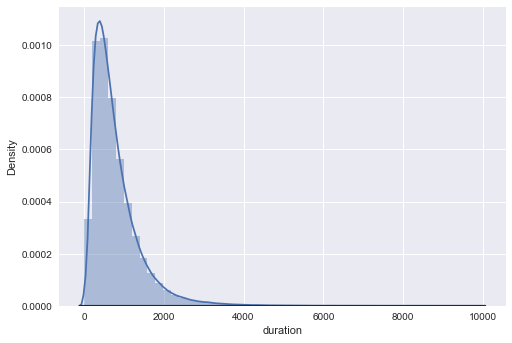

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
#sns.distplot(df['duration'])
sns.distplot(df['duration'],kde=True,fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

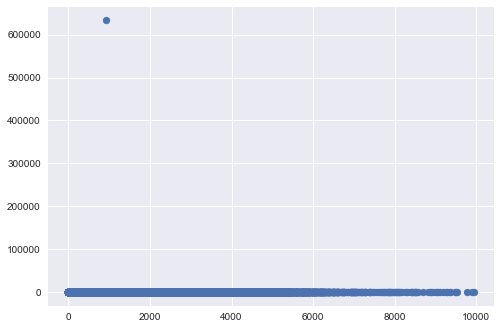

In [12]:
plt.scatter(df.duration,df.trip_distance)

<h2>As you see above, there are some outliers in the dataset that are probably incorrect. For simplicity, remove these datapoints from the dataset and plot the scatter plot again.</h2>

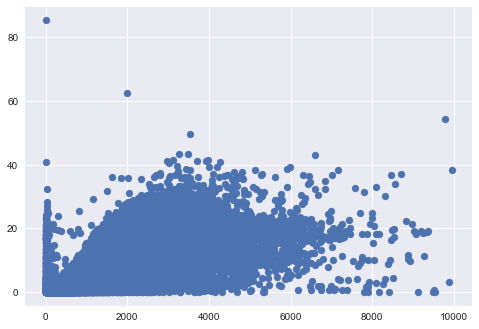

In [13]:
df=df[df['trip_distance']<100]
plt.scatter(df.duration,df.trip_distance)

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [14]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.weekday()+1)

C:\Users\lfh\AppData\Local\Temp\ipykernel_23128\375426246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.weekday()+1)


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>
pickup_hour should take values 0 to 23

In [15]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df

C:\Users\lfh\AppData\Local\Temp\ipykernel_23128\3411083059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
The result should be a single plot with day_of_week on the x-axis and count of records on the y-axis. Different colors are used to distinguish different pickup_hour in the legend.
<li>Do you notice any differences?</li>

<AxesSubplot:xlabel='day_of_week'>

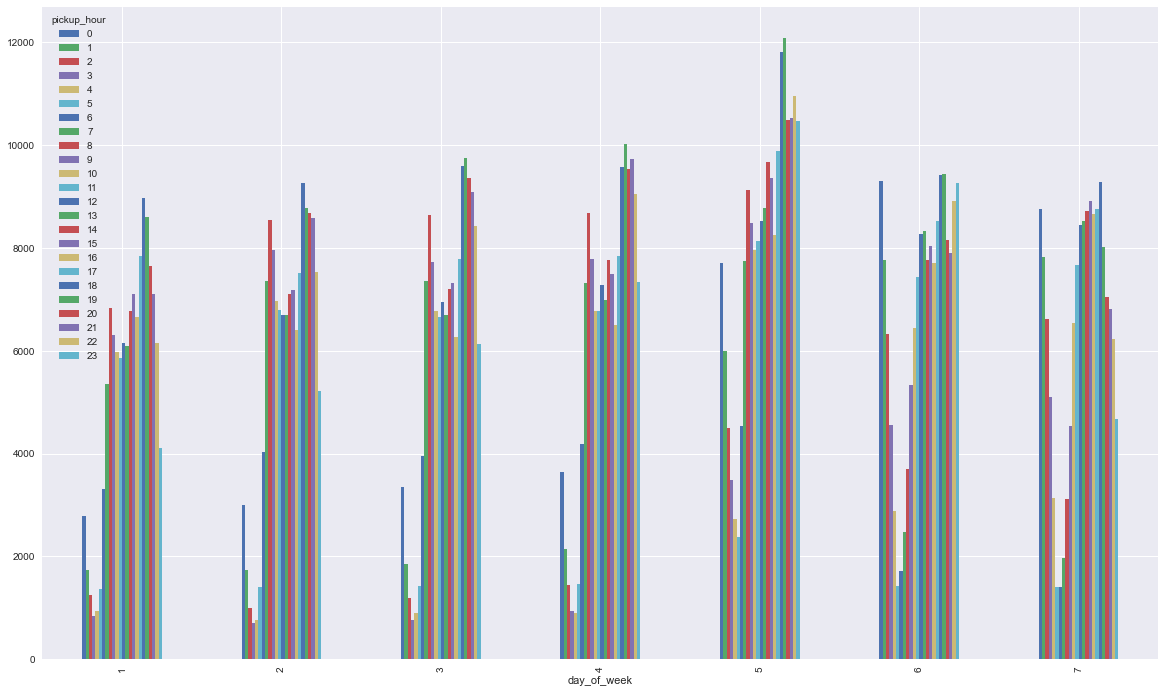

In [16]:
gb = df.groupby(['day_of_week', 'pickup_hour']).size().unstack()
gb.plot(kind='bar',figsize=(20,12))

<h2>Create zones</h2>
Each rectangular zone is associated with a list of 5 coordinates. 

Hints:
- The first coordinate corresponds to the bottom left edge of the zone
- The second coordinate corresponds to the bottom right edge
- The third coordinate corresponds to the top right edge
- The fourth coordinate corresponds to the top left edge
- The final coordinate corresponds to the bottom left edge again

In [17]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    lgth=(eastlimit-westlimit)/zone_factor
    ht=(northlimit-southlimit)/zone_factor
    
    zone_index=0
    y=southlimit
    while y<=northlimit-ht:
        x=westlimit
        while x<=eastlimit-lgth:
            coordinates=[[x,y],[x+lgth,y],[x+lgth,y+ht],[x,y+ht],[x,y]]
            zone_table.append((str(zone_index),coordinates))
            x+=lgth
            zone_index+=1
        y+=ht
        
    return zone_table

In [18]:
createZoneTable(zone_factor=20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

[('0',
  [[-74.2635, 40.4856],
   [-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.2635, 40.509299999999996],
   [-74.2635, 40.4856]]),
 ('1',
  [[-74.237955, 40.4856],
   [-74.21241, 40.4856],
   [-74.21241, 40.509299999999996],
   [-74.237955, 40.509299999999996],
   [-74.237955, 40.4856]]),
 ('2',
  [[-74.21241, 40.4856],
   [-74.18686500000001, 40.4856],
   [-74.18686500000001, 40.509299999999996],
   [-74.21241, 40.509299999999996],
   [-74.21241, 40.4856]]),
 ('3',
  [[-74.18686500000001, 40.4856],
   [-74.16132000000002, 40.4856],
   [-74.16132000000002, 40.509299999999996],
   [-74.18686500000001, 40.509299999999996],
   [-74.18686500000001, 40.4856]]),
 ('4',
  [[-74.16132000000002, 40.4856],
   [-74.13577500000002, 40.4856],
   [-74.13577500000002, 40.509299999999996],
   [-74.16132000000002, 40.509299999999996],
   [-74.16132000000002, 40.4856]]),
 ('5',
  [[-74.13577500000002, 40.4856],
   [-74.11023000000003, 40.4856],
   [-74.11023000000003, 40.50929999

Calling the function createZoneTable(zone_factor=20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596) should yield result:

[('00',
  [[-74.2635, 40.4856],
   [-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.2635, 40.509299999999996],
   [-74.2635, 40.4856]]),
 ('01',
  [[-74.237955, 40.4856],
   [-74.21241, 40.4856],
   [-74.21241, 40.509299999999996],
   [-74.237955, 40.509299999999996],
   [-74.237955, 40.4856]]),
 ('02',
  [[-74.21240999999999, 40.4856],
   [-74.186865, 40.4856],
   [-74.186865, 40.509299999999996],
   [-74.21240999999999, 40.509299999999996],
   [-74.21240999999999, 40.4856]]),...

<h2>Now, create a GeoJsonObject using the zones defined in the zone table</h2>
The zone_ids should run from '00' to '399'. 

Hints:
- The bottom left zone is '00'
- The bottom right zone is '19'
- The left-most zone in the second row from the bottom is '20'
- The right-most zone in the second row from the bottom is '39'
- The top left zone is '380'
- The top right zone is '399'

In [19]:
def createGeoJsonObject(zone_table):
    
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    
    #append elements in features_list
    for i in zone_table:
        coordinates=[i[1]]
        geometry_value={'coordinates':coordinates, 'type': 'Polygon'}
        features_element={'geometry': geometry_value, 'properties': {'zone_id': i[0]}, 'type': 'Feature'}
        
        zone_data_dict_features.append(features_element)
    
    zone_data_dict['features'] = zone_data_dict_features
    
    return zone_data_dict

<h3>Create the zone table for zone_factor = 20</h3>

In [20]:
zone_table = createZoneTable(zone_factor=20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '0'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21241, 40.4856],
      [-74.21241, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '1'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21241, 40.4856],
      [-74.18686500000001, 40.4856],
      [-74.18686500000001, 40.509299999999996],
      [-74.21241, 40.509299999999996],
      [-74.21241, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '2'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.18686500000001, 40.4856],
      [-74.16132000000002, 40.4856],
      [-74.1613200

Calling the function createGeoJsonObject(zone_table) should yield result:

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21241, 40.4856],
      [-74.21241, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.186865, 40.4856],
      [-74.16132, 40.4856],
      [-74.16132, 40.509299999999996],
      [-74.186865, 40.509299999999996],
      [-74.186865, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '03'},
   'type': 'Feature'},... ... ...,
   {'geometry': {'coordinates': [[[-73.80369, 40.935900000000004],
      [-73.77814500000001, 40.935900000000004],
      [-73.77814500000001, 40.9596],
      [-73.80369, 40.9596],
      [-73.80369, 40.935900000000004]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '398'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-73.778145, 40.935900000000004],
      [-73.7526, 40.935900000000004],
      [-73.7526, 40.9596],
      [-73.778145, 40.9596],
      [-73.778145, 40.935900000000004]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '399'},
   'type': 'Feature'}]}

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "122" (for a zone factor of 20, assuming you have numbered the zones from "0" to "399")

In [21]:
def get_zone(lon,lat,zone_table):
    for (i,j) in zone_table:
        if j[0][0]<lon<j[1][0] and j[1][1]<lat<j[2][1]:
            zone=i
    return zone

In [22]:
get_zone(-74.19,40.65,zone_table)

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>Hint on how to apply a function to 2 columns in a dataframe</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [23]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [24]:
df['pickup_zone'] =df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'],zone_table),axis=1)

C:\Users\lfh\AppData\Local\Temp\ipykernel_23128\3277738198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_zone'] =df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'],zone_table),axis=1)
C:\Users\lfh\AppData\Local\Temp\ipykernel_23128\3277738198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'],zone_table),axis=1)


In [25]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,255,271


In [26]:
df2=df.copy(deep=True)
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,255,271


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest number of pickups
<li>Zone with the highest number of dropoffs

In [27]:
percent=len(df[df['pickup_zone']==df['dropoff_zone']])/len(df)
print('Percentage of the total rides where the pickup zone is the same as the dropoff zone:',percent)

max_pickupzone=df['pickup_zone'].value_counts().idxmax()
print('Zone with the highest number of pickups: ', max_pickupzone)

max_dropoffzone=df['dropoff_zone'].value_counts().idxmax()
print('Zone with the highest number of dropoffs: ', max_dropoffzone)



Percentage of the total rides where the pickup zone is the same as the dropoff zone: 0.23668211095184452
Zone with the highest number of pickups:  231
Zone with the highest number of dropoffs:  231


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [28]:
gb=df.groupby(['pickup_zone','pickup_hour']).size().unstack()

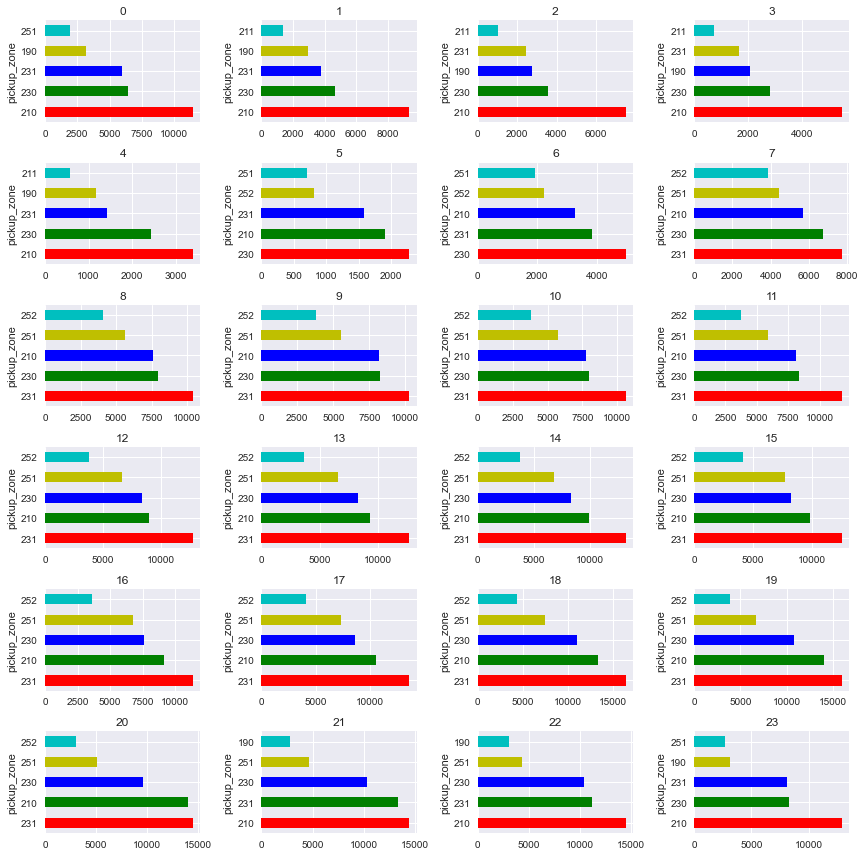

In [29]:
%matplotlib inline
COL_NUM = 4
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))  #return figure and an array of subplots

colors = ['r','g','b','y','c']
for i, (hour, zone) in enumerate(gb.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone = zone.sort_values(ascending=False)[:5] 
    zone.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(hour)

plt.tight_layout() 

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [30]:
gb=df.groupby(['pickup_zone','day_of_week']).size().unstack()

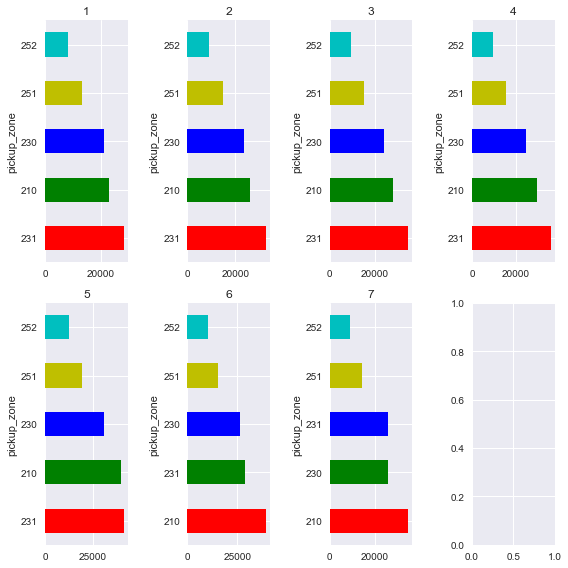

In [31]:
%matplotlib inline
COL_NUM = 4
ROW_NUM = 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(8,8))  #return figure and an array of subplots

colors = ['r','g','b','y','c']
for i, (week, zone) in enumerate(gb.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone = zone.sort_values(ascending=False)[:5] 
    zone.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(week)

plt.tight_layout() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday (i.e. Monday to Friday)

In [32]:
df3=df.copy(deep=True)
df3=df3[(df3['day_of_week']<=5)&(df3['pickup_hour']==8)]
print(df3['pickup_zone'].value_counts().idxmax())

231


<h2>Create a pickup counts dataframe</h2>
<li>The dataframe should have 2 columns - pickup_zone and pickup_count. For clarity, pickup_count is the total count of pickups from the corresponding pickup_zone in the dataset. 

In [33]:
gb_pkzone=df.groupby('pickup_zone').size()
df_pkzone=gb_pkzone.to_frame()
df_pkzone=df_pkzone.reset_index()
df_pkzone.columns=['pickup_zone','pickup_count']
df_pkzone

,pickup_zone,pickup_count
0,104,1
1,106,1
2,107,1
3,108,5
4,109,27
...,...,...
202,93,2
203,94,1
204,97,1
205,98,4


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the pickup counts dataframe. (see class example) 

In [34]:
import folium
m = folium.Map(location = [df['pickup_latitude'].mean(),df['pickup_longitude'].mean()],zoom_start=12)

m.choropleth(geo_data=createGeoJsonObject(zone_table), data=df_pkzone,
             columns=[ 'pickup_zone','pickup_count'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Pickup Point')
folium.LayerControl().add_to(m)

C:\Users\lfh\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
m

<h2>Optional question: Remove every zone that has 0 originating trips</h2>